# DOG & CAT Detection

In [1]:
#plt.style.use('ggplot')
%config IPCompleter.greedy=True
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("input/"))

['test_set.zip', 'test_set', 'training_set.zip', '.ipynb_checkpoints', 'training_set']


#Remove Folder when foler not empty
import shutil
shutil.rmtree('input/test_set/')

#extract file
import zipfile
with zipfile.ZipFile('input/training_set.zip', 'r') as zip_ref:
    zip_ref.extractall('input/')

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image

In [4]:
train_dog = "input/training_set/dogs"
train_cat= "input/training_set/cats"
test_dog= "input/test_set/dogs"
test_cat= "input/test_set/cats"
img_height = 200
img_width = 200

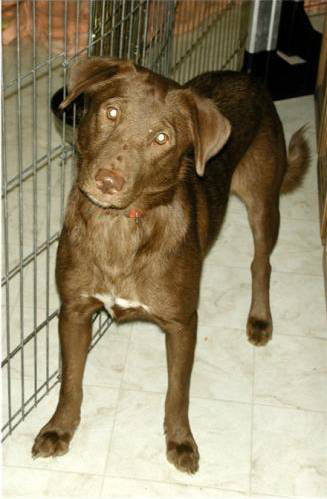

In [5]:
Image.open("input/training_set/dogs/dog.1.jpg")

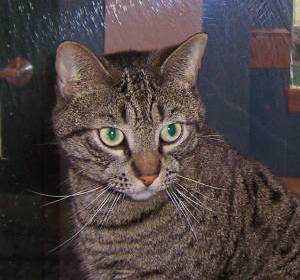

In [6]:
Image.open("input/training_set/cats/cat.1.jpg")

100%|██████████| 4000/4000 [00:07<00:00, 542.48it/s]


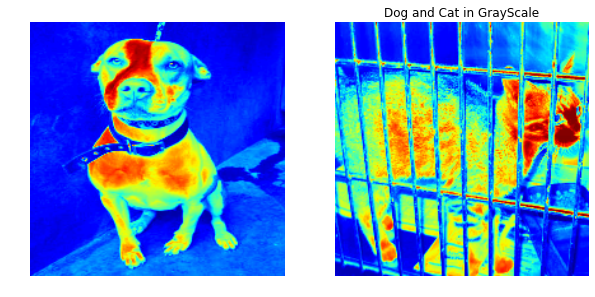

In [7]:
for i_dog in tqdm(os.listdir(train_dog)): 
    try:
        path = os.path.join(train_dog, i_dog)
        img_dog = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img_dog = cv2.resize(img_dog, (img_height, img_width)).flatten()   
        np_img_dog = np.asarray(img_dog)
    except Exception as e:
        print(str(e))
    
for i_cat in tqdm(os.listdir(train_cat)):
    try:
        path = os.path.join(train_cat, i_cat)
        img_cat = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img_cat = cv2.resize(img_cat, (img_height, img_width)).flatten() 
        np_img_cat = np.asarray(img_cat)
    except Exception as e:
        print(str(e))

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img_dog.reshape(img_height, img_width))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img_cat.reshape(img_height, img_width))
plt.axis('off')
plt.title("Dog and Cat in GrayScale")

In [55]:
def train_data():
    train_data_dog = [] 
    train_data_cat = []
    count_dog = 0;
    for i_dog in tqdm(os.listdir(train_dog)): 
        try:
            count_dog += 1
            path = os.path.join(train_dog, i_dog)
            img_dog = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
            img_dog = cv2.resize(img_dog, (img_height, img_width))
            if(count_dog <= 3000):
                train_data_dog.append(img_dog) 
        except Exception as e:
            print(str(e))
            
    count_cat = 0;
    for i_cat in tqdm(os.listdir(train_cat)):
        try:
            count_cat += 1
            path = os.path.join(train_cat, i_cat)
            img_cat = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
            img_cat = cv2.resize(img_cat, (img_height, img_width))
            if(count_cat <= 3000):
                train_data_cat.append(img_cat)
        except Exception as e:
            print(str(e))
    
    train_data = np.concatenate((np.asarray(train_data_dog), np.asarray(train_data_cat)), axis=0)
    return train_data 

In [56]:
def test_data():
    test_data_dog = [] 
    test_data_cat=[]
    for i_dog in tqdm(os.listdir(test_dog)): 
        try:
            path = os.path.join(test_dog, i_dog)
            img_dog = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
            img_dog = cv2.resize(img_dog, (img_height, img_width))
            test_data_dog.append(img_dog) 
        except Exception as e:
            print(str(e))
            
    for i_cat in tqdm(os.listdir(test_cat)): 
        try:
            path = os.path.join(test_cat, i_cat)
            img_cat = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
            img_cat = cv2.resize(img_cat, (img_height, img_width))
            test_data_cat.append(img_cat) 
        except Exception as e:
            print(str(e))
    test_data = np.concatenate((np.asarray(test_data_dog), np.asarray(test_data_cat)), axis=0) 
    return test_data

In [57]:
train_data = train_data() 
test_data = test_data()

100%|██████████| 1000/1000 [00:02<00:00, 434.58it/s]


In [58]:
x_data = train_data
x_data.shape

(6000, 200, 200)

In [59]:
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
x_data.shape


(6000, 200, 200)

In [60]:
z1 = np.zeros(3000)
o1 = np.ones(3000)
Y_train = np.concatenate((o1, z1), axis=0)

z = np.zeros(1000)
o = np.ones(1000)
Y_test = np.concatenate((o, z), axis=0)

In [61]:
y_data = Y_train.reshape(x_data.shape[0], 1)

In [62]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (6000, 200, 200)
Y shape:  (6000, 1)


In [63]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)


In [64]:
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [65]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])

print("X train flatten", x_train_flatten.shape)
print("X test flatten", x_test_flatten.shape)

X train flatten (5100, 40000)
X test flatten (900, 40000)


In [66]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (40000, 5100)
x test:  (40000, 900)
y train:  (1, 5100)
y test:  (1, 900)


## LOGISTIC REGRESSION

In [74]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = 0.0001
    return w, b

In [75]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [76]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost, gradients

In [80]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion):
        
        cost, gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 500 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [81]:
def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [82]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):

    dimension =  x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))

Cost after iteration 0: nan
Cost after iteration 500: 0.754620
Cost after iteration 1000: 0.735487
Cost after iteration 1500: 0.720452
Cost after iteration 2000: 0.707202
Cost after iteration 2500: 0.695093
Cost after iteration 3000: 0.683832
Cost after iteration 3500: 0.673252
Cost after iteration 4000: 0.663241
Cost after iteration 4500: 0.653718
Cost after iteration 5000: 0.644619
Cost after iteration 5500: 0.635894
Cost after iteration 6000: 0.627501
Cost after iteration 6500: 0.619406
Cost after iteration 7000: 0.611580
Cost after iteration 7500: 0.603999
Cost after iteration 8000: 0.596644
Cost after iteration 8500: 0.589496
Cost after iteration 9000: 0.582543
Cost after iteration 9500: 0.575775
Cost after iteration 10000: 0.569187
Cost after iteration 10500: 0.562790
Cost after iteration 11000: 0.556642
Cost after iteration 11500: 0.551013
Cost after iteration 12000: 0.546771
Cost after iteration 12500: 0.543667
Cost after iteration 13000: 0.540698
Cost after iteration 13500: 0.

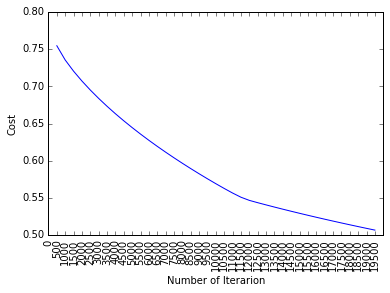

Test Accuracy: 54.44 %
Train Accuracy: 79.71 %


In [83]:
logistic_regression(x_train, y_train, x_test, y_test, learning_rate = 0.001, num_iterations = 20000)